In [87]:
import pandas as pd
import numpy as np
import math





In [88]:
data = pd.read_csv('filtered_co2_data.csv')
data.head()




,a,b,c,d,e,f,g,h,i,j,...,s,t,u,v,w,x,y,z,1,2
0,0.0,0.0,4873.85,2923.55,7603.05,1340.0,277.2,0.0,1847.6,9391.4,...,22.1,0.3,0.1,0.0,0.4,0.2,0.0,0.0,0.3,0.7
1,0.0,3843751.7,21460.00,12457.70,33917.70,1594.6,1426.5,0.0,3021.1,36938.8,...,74.8,1.3,0.2,0.5,2.1,0.1,0.1,0.0,0.2,2.3
2,0.0,0.0,48854.10,35144.70,83998.80,3755.5,4316.0,0.0,8071.4,92070.3,...,167.2,3.1,2.2,0.0,5.3,0.9,0.0,0.0,0.9,6.2
3,0.0,0.0,690.80,137.20,827.90,277.6,68.5,0.0,346.1,1174.0,...,22.1,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.3,0.7
4,0.0,0.0,849.90,568.00,1418.00,1091.0,119.9,0.0,1210.9,2628.8,...,8.1,0.1,0.0,0.0,0.1,0.2,0.0,0.0,0.2,0.2


In [89]:
x = data.drop(["2"], axis=1)
y = data["2"]
x.head()

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,1
0,0.0,0.0,4873.85,2923.55,7603.05,1340.0,277.2,0.0,1847.6,9391.4,...,7.9,22.1,0.3,0.1,0.0,0.4,0.2,0.0,0.0,0.3
1,0.0,3843751.7,21460.00,12457.70,33917.70,1594.6,1426.5,0.0,3021.1,36938.8,...,10.5,74.8,1.3,0.2,0.5,2.1,0.1,0.1,0.0,0.2
2,0.0,0.0,48854.10,35144.70,83998.80,3755.5,4316.0,0.0,8071.4,92070.3,...,16.8,167.2,3.1,2.2,0.0,5.3,0.9,0.0,0.0,0.9
3,0.0,0.0,690.80,137.20,827.90,277.6,68.5,0.0,346.1,1174.0,...,7.9,22.1,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.3
4,0.0,0.0,849.90,568.00,1418.00,1091.0,119.9,0.0,1210.9,2628.8,...,5.7,8.1,0.1,0.0,0.0,0.1,0.2,0.0,0.0,0.2


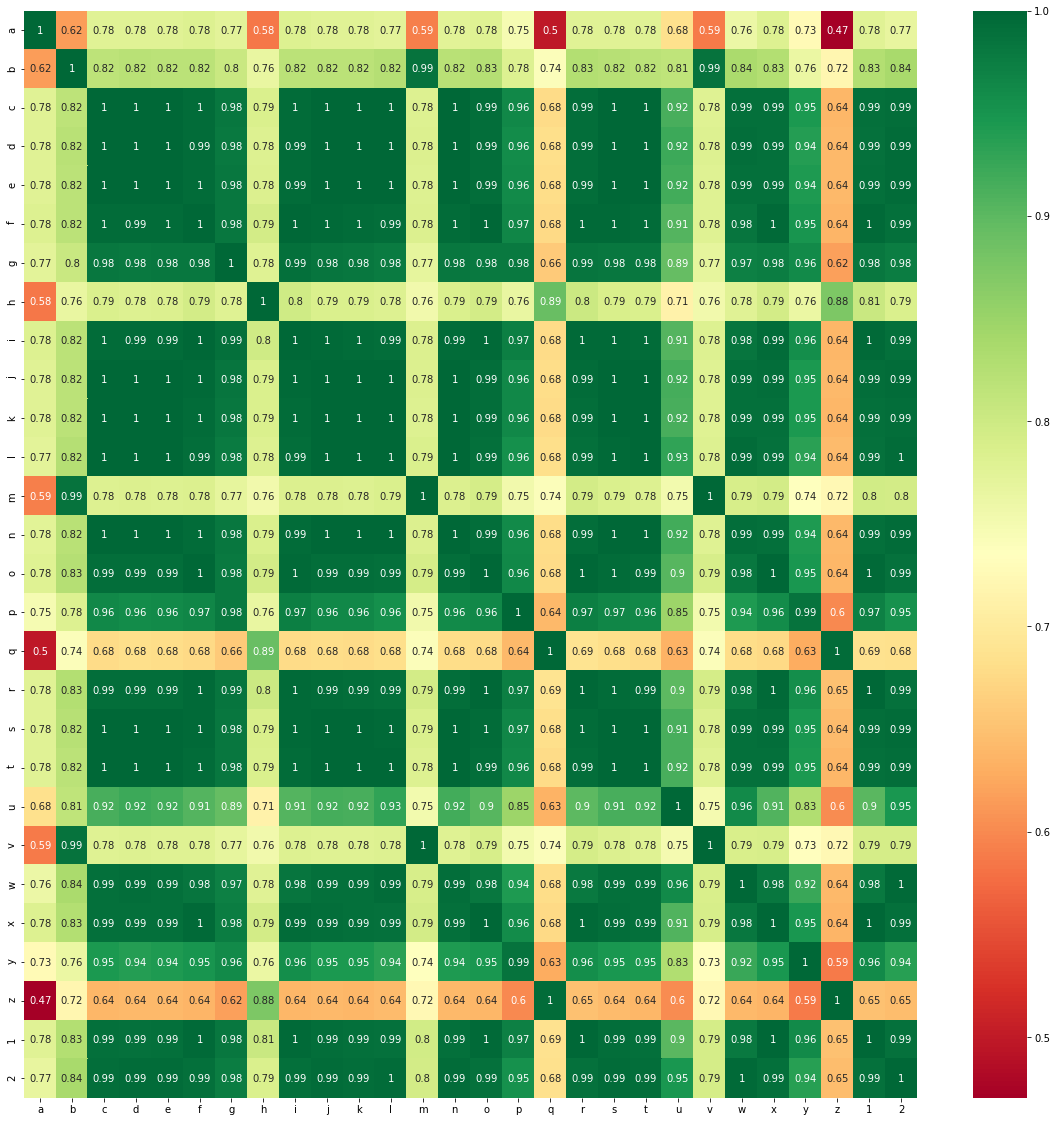

In [90]:
correlationMatrix = pd.concat([x,y], axis=1)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
g=sns.heatmap(correlationMatrix.corr(),annot=True,cmap="RdYlGn")





In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)




In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression


from sklearn.metrics import mean_absolute_error
from datetime import datetime



In [93]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [94]:
acc_xgboost = 0
mae_xgboost = 999
def xgboost(): 
    global xgboost
    global acc_xgboost
    global mae_xgboost
    xgboost = XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
    xgboost.fit(x_train, y_train)
    predictions = xgboost.predict(x_train)
    mae_xgboost = mean_absolute_error(predictions, y_train)
    print("Train MAE: ", mae_xgboost)
    acc_xgboost = round(xgboost.score(x_train, y_train) * 100, 2)
    print("Train R^2: ", acc_xgboost)
    predictions = xgboost.predict(x_test)
    mae_xgboost = mean_absolute_error(predictions, y_test)
    print("Test MAE: ", mae_xgboost)
    acc_xgboost = round(xgboost.score(x_test, y_test) * 100, 2)
    print("Test R^2: ", acc_xgboost) 
    
    feature_importances = pd.DataFrame(xgboost.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
        
    
start_time = timer(None)
xgboost() 
timer(start_time)

Train MAE:  0.0007318247587253387
Train R^2:  100.0
Test MAE:  0.1363871476589105
Test R^2:  97.94
     importance
a  9.153008e-01
c  5.303004e-02
l  1.029662e-02
s  7.829524e-03
w  7.770268e-03
h  4.482443e-03
p  5.227581e-04
1  2.643218e-04
d  2.027816e-04
f  1.093957e-04
x  9.845582e-05
u  3.919910e-05
i  2.469242e-05
n  1.386934e-05
o  5.939562e-06
b  2.357842e-06
g  1.563587e-06
q  1.528069e-06
j  1.014376e-06
e  9.858974e-07
y  7.486895e-07
r  7.209524e-07
m  3.360192e-08
t  0.000000e+00
v  0.000000e+00
k  0.000000e+00
z  0.000000e+00

 Time taken: 0 hours 0 minutes and 0.3 seconds.


In [95]:
acc_svr = 0
mae_svr = 999
def SVM():
    global acc_svr
    global mae_svr
    svr = SVR(kernel='rbf')
    svr.fit(x_train, y_train)
    predictions = svr.predict(x_train)
    mae_svr = mean_absolute_error(predictions, y_train)
    print("Train MAE: ", mae_svr)
    acc_svr = round(svr.score(x_train, y_train) * 100, 2)
    print("Train R^2: ", acc_svr)
    predictions = svr.predict(x_test)
    mae_svr = mean_absolute_error(predictions, y_test)
    print("Test MAE: ", mae_svr)
    acc_svr = round(svr.score(x_test, y_test) * 100, 2)
    print("Test R^2: ", acc_svr)
    
    
    
start_time = timer(None)
SVM()
timer(start_time)

Train MAE:  4.093171235192798
Train R^2:  4.29
Test MAE:  1.047727195087382
Test R^2:  -40.77

 Time taken: 0 hours 0 minutes and 0.02 seconds.


In [96]:
acc_gaussian = 0
mae_gaussian = 999
def Gaussian(): 
    global acc_gaussian
    global mae_gaussian
    gaussian = GaussianProcessRegressor()
    gaussian.fit(x_train, y_train)
    predictions = gaussian.predict(x_train)
    mae_gaussian = mean_absolute_error(predictions, y_train)
    print("Train MAE: ", mae_gaussian)
    acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
    print("Train R^2: ", acc_gaussian)
    predictions = gaussian.predict(x_test)
    mae_gaussian = mean_absolute_error(predictions, y_test)
    print("Test MAE: ", mae_gaussian)
    acc_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
    print("Test R^2: ", acc_gaussian)
    
    
    
    
    
start_time = timer(None)
Gaussian()
timer(start_time)

Train MAE:  5.000643574440198e-10
Train R^2:  100.0
Test MAE:  1.2141025641034615
Test R^2:  -44.55

 Time taken: 0 hours 0 minutes and 0.07 seconds.


In [97]:
acc_sgd = 0
mae_sgd = 999
def SGD():
    global acc_sgd
    global mae_sgd
    sgd = SGDRegressor()
    sgd.fit(x_train, y_train)
    predictions = sgd.predict(x_train)
    mae_sgd = mean_absolute_error(predictions, y_train)
    print("Train MAE: ", mae_sgd)
    acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
    print("Train R^2: ", acc_sgd)
    predictions = sgd.predict(x_test)
    mae_sgd = mean_absolute_error(predictions, y_test)
    print("Test MAE: ", mae_sgd)
    acc_sgd = round(sgd.score(x_test, y_test) * 100, 2)
    print("Test R^2: ", acc_sgd)
    

        
start_time = timer(None)
SGD()
timer(start_time)

Train MAE:  8.803906791499807e+20
Train R^2:  -3.4956253391281653e+42
Test MAE:  2.8097391939346173e+20
Test R^2:  -5.28378601895874e+43

 Time taken: 0 hours 0 minutes and 0.01 seconds.


In [98]:
acc_decision_tree = 0 # seems like over fitting
mae_decision_tree = 999
def DecisionTree():
    global acc_decision_tree
    global mae_decision_tree
    decision_tree = DecisionTreeRegressor()
    decision_tree.fit(x_train, y_train)
    predictions = decision_tree.predict(x_train)
    mae_decision_tree = mean_absolute_error(predictions, y_train)
    print("Train MAE: ", mae_decision_tree)
    acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
    print("Train R^2: ", acc_decision_tree)
    predictions = decision_tree.predict(x_test)
    mae_decision_tree = mean_absolute_error(predictions, y_test)
    print("Test MAE: ", mae_decision_tree)
    acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
    print("Test R^2: ", acc_decision_tree)
    
    feature_importances = pd.DataFrame(decision_tree.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    
DecisionTreestart_time = timer(None)
DecisionTree()
timer(start_time)

Train MAE:  3.7349930840454487e-16
Train R^2:  100.0
Test MAE:  0.1782051282051285
Test R^2:  94.87
     importance
e  8.905837e-01
j  9.168908e-02
w  1.192494e-02
s  5.039717e-03
a  5.986491e-04
r  5.132912e-05
i  2.573531e-05
t  1.647308e-05
k  1.544920e-05
m  1.207778e-05
1  1.015407e-05
p  8.465030e-06
g  6.783728e-06
x  5.889911e-06
n  4.024715e-06
o  2.499452e-06
f  1.871218e-06
y  1.461206e-06
c  1.039025e-06
h  3.653014e-07
u  2.722458e-07
d  3.995484e-08
b  3.314226e-08
l  0.000000e+00
q  0.000000e+00
v  0.000000e+00
z  0.000000e+00

 Time taken: 0 hours 0 minutes and 0.05 seconds.


In [99]:
acc_random_forest = 0 #less variance 
mae_random_forest = 999
def RandomForest():
    global random_forest
    global acc_random_forest
    global mae_random_forest
    random_forest = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
    random_forest.fit(x_train, y_train)
    predictions = random_forest.predict(x_train)
    mae_random_forest = mean_absolute_error(predictions, y_train)
    print("Train MAE: ", mae_random_forest)
    acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
    print("Train R^2: ", acc_random_forest)
    predictions = random_forest.predict(x_test)
    mae_random_forest = mean_absolute_error(predictions, y_test)
    print("Test MAE: ", mae_random_forest)
    acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
    print("Test R^2: ", acc_random_forest)
    
    feature_importances = pd.DataFrame(random_forest.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    
start_time = timer(None)
RandomForest()
timer(start_time)

Train MAE:  0.7484746794871758
Train R^2:  90.76
Test MAE:  0.17788589743589836
Test R^2:  95.7
   importance
i    0.096758
u    0.085468
j    0.076582
e    0.074955
g    0.072026
w    0.070216
n    0.065526
c    0.063818
l    0.056705
d    0.056345
k    0.054429
f    0.040685
t    0.037089
x    0.022378
s    0.021437
1    0.017233
y    0.011404
h    0.011218
b    0.010343
p    0.010256
z    0.009676
a    0.008858
m    0.008222
v    0.006925
q    0.005772
r    0.003485
o    0.002191

 Time taken: 0 hours 0 minutes and 2.91 seconds.


In [100]:
acc_extra_trees = 0
mae_extra_trees = 999
def ExtraTrees():
    global extra_trees
    global acc_extra_trees
    global mae_extra_trees
    extra_trees = ExtraTreesRegressor(n_estimators=250,random_state=0)
    extra_trees.fit(x_train, y_train)
    predictions = extra_trees.predict(x_train)
    mae_extra_trees = mean_absolute_error(predictions, y_train)
    print("Train MAE: ", mae_extra_trees)
    acc_extra_trees = round(extra_trees.score(x_train, y_train) * 100, 2)
    print("Train R^2: ", acc_extra_trees)
    predictions = extra_trees.predict(x_test)
    mae_extra_trees = mean_absolute_error(predictions, y_test)
    print("Test MAE: ", mae_extra_trees)
    acc_extra_trees = round(extra_trees.score(x_test, y_test) * 100, 2)
    print("Test R^2: ", acc_extra_trees)
    
    feature_importances = pd.DataFrame(extra_trees.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
        
start_time = timer(None)
ExtraTrees() 
timer(start_time)

Train MAE:  1.7287987281050095e-14
Train R^2:  100.0
Test MAE:  0.1025794871794876
Test R^2:  97.99
   importance
d    0.088865
r    0.057643
t    0.054706
w    0.054607
e    0.054261
n    0.053343
j    0.052580
x    0.051673
c    0.042515
y    0.039239
f    0.038770
s    0.037219
a    0.035764
h    0.035651
1    0.033740
l    0.033226
k    0.032160
g    0.032096
i    0.031632
o    0.027710
u    0.026557
p    0.024975
b    0.021554
v    0.017962
m    0.017950
q    0.003587
z    0.000014

 Time taken: 0 hours 0 minutes and 0.48 seconds.


In [101]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 
              'Random Forest', 'Gaussian', 
              'Stochastic Gradient Descent',  
              'Decision Tree', 'XGBoost', 'ExtraTrees'],
    'Score': [acc_svr, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_decision_tree, acc_xgboost,acc_extra_trees],
    'Error': [mae_svr, 
              mae_random_forest, mae_gaussian, 
              mae_sgd, mae_decision_tree, mae_xgboost,mae_extra_trees]
})
models.sort_values(by='Error', ascending=True)


,Model,Score,Error
6,ExtraTrees,9.799000e+01,1.025795e-01
5,XGBoost,9.794000e+01,1.363871e-01
1,Random Forest,9.570000e+01,1.778859e-01
4,Decision Tree,9.487000e+01,1.782051e-01
0,Support Vector Machines,-4.077000e+01,1.047727e+00
2,Gaussian,-4.455000e+01,1.214103e+00
3,Stochastic Gradient Decent,-5.283786e+43,2.809739e+20


In [102]:
#since lowest error is achieved by extra trees regression, we shall assume it is the best model to move forth with
feature_importances = pd.DataFrame(extra_trees.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

   importance
d    0.088865
r    0.057643
t    0.054706
w    0.054607
e    0.054261
n    0.053343
j    0.052580
x    0.051673
c    0.042515
y    0.039239
f    0.038770
s    0.037219
a    0.035764
h    0.035651
1    0.033740
l    0.033226
k    0.032160
g    0.032096
i    0.031632
o    0.027710
u    0.026557
p    0.024975
b    0.021554
v    0.017962
m    0.017950
q    0.003587
z    0.000014
